# Generating a fake dataset

In [1]:
import pandas as pd
import random

Week_days = ['Monday', 'Tuesday','Wednesday','Thursday','Friday'] 
Weekend = ['Saturday','Sunday']
Hour = []
Dates = []
nb_passengers = []
weekday_yes = []

var = 0
i = -1

while var<100:  
    if i < len(Week_days)-1:
        i+=1
    else : 
        i = 0
    for j in range(15): 
        Dates.append(Week_days[i])
        weekday_yes.append(1)
        Hour.append(j+6)
        if (j+6) in [7,8,17,18,19,20]: 
            nb_passengers.append(random.randint(100,200))
        else: 
            nb_passengers.append(random.randint(50,100))
    var += 1


var = 0
i = -1
while var<100:  
    if i < len(Weekend)-1:
        i+=1
    else:
        i=0
    for j in range(15): 
        Dates.append(Weekend[i])
        weekday_yes.append(0)
        Hour.append(j+6)
        if (j+6) in [7,8,17,18,19,20]: 
            nb_passengers.append(round(random.randint(100,200)/2))
        else: 
            nb_passengers.append(round(random.randint(50,100)/2))
    var += 1

df = list(zip(Dates, Hour,nb_passengers,weekday_yes))
data = pd.DataFrame(df, columns=["Dates","Hour", "nb_passengers", "weekday_yes"])


In [2]:
data.shape

(3000, 4)

In [13]:
data.tail(90)

,Dates,Hour,nb_passengers,weekday_yes
2910,Saturday,6,45,0
2911,Saturday,7,52,0
2912,Saturday,8,86,0
2913,Saturday,9,30,0
2914,Saturday,10,27,0
...,...,...,...,...
2995,Sunday,16,32,0
2996,Sunday,17,70,0
2997,Sunday,18,80,0
2998,Sunday,19,59,0


## Randomly mixing the dataset rows and writing it to a csv file 

In [13]:
from sklearn.utils import shuffle
import random
random.seed(40)
data=shuffle(data)

In [14]:
data.to_csv('fakedata_bus.csv', header=True)

In [15]:
data.head(20)

,Hour,nb_passengers,weekday_yes,Dates
2160,6,38,0,Saturday
2807,8,90,0,Sunday
308,14,98,1,Monday
2749,10,42,0,Sunday
2874,15,38,0,Sunday
2596,7,59,0,Sunday
1445,11,74,1,Tuesday
529,10,77,1,Monday
1081,7,153,1,Wednesday
1119,15,79,1,Friday


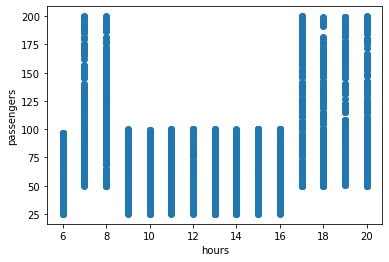

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
x = data.iloc[:,0]
y = data.iloc[:,1]
plt.scatter(x, y)
plt.xlabel('hours')
plt.ylabel('passengers');

## Modeling the data

In [21]:
X = data.drop("nb_passengers", axis=1)
Y = data["nb_passengers"]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3)

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
pred = regr.predict(X_test)

ValueError: could not convert string to float: 'Friday'

In [19]:
regr.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [21]:
regr.coef_

array([ 2.15845231, 51.70146736])

In [22]:
X = data.drop(["nb_passengers", "weekday_yes"], axis=1)
Y = data["nb_passengers"]
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)
predd = reg.predict(X_train)
reg.coef_

array([2.42775242])